<h2> 군집화 </h2>
<h3> [데이터 불러오기] </h3>

In [263]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
pd.set_option('display.float_format', '{:,.2f}'.format)

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1_전처리및212223인구.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생
raw_df2 = pd.read_csv('Data2_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생
raw_df3 = pd.read_csv('Data3_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df1 = raw_df1.copy()
df2 = raw_df2.copy()
df3 = raw_df3.copy()

<hr>

<h3> [데이터1 파생변수 추가 및 정리] </h3>

In [264]:
# df1 살펴보기
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488","32,650","30,838","32,606","62,302","32,137","30,165","1,186",513,673
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488","32,650","30,838","32,606","62,302","32,137","30,165","1,186",513,673
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488","32,650","30,838","32,606","62,302","32,137","30,165","1,186",513,673
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488","32,650","30,838","32,606","62,302","32,137","30,165","1,186",513,673
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488","32,650","30,838","32,606","62,302","32,137","30,165","1,186",513,673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092","485,329","436,763","372,888","887,015","460,788","426,227","35,077","24,541","10,536"
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092","485,329","436,763","372,888","887,015","460,788","426,227","35,077","24,541","10,536"
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092","485,329","436,763","372,888","887,015","460,788","426,227","35,077","24,541","10,536"
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092","485,329","436,763","372,888","887,015","460,788","426,227","35,077","24,541","10,536"


In [265]:
# df1 변수들의 타입 확인
df1.dtypes

기준연도           int64
시군명           object
연령대           object
성별            object
결제건수           int64
결제금액         float64
결제취소건수       float64
결제취소금액       float64
1회평균결제금액     float64
총인구           object
총인구_남         object
총인구_여         object
내국인_세대수       object
내국인_총인구       object
내국인_남         object
내국인_여         object
등록외국인_총인구     object
등록외국인_남       object
등록외국인_여       object
dtype: object

In [266]:
# 숫자 변수들이 object로 되어 있으므로 float로 변경 

# 변환할 열 목록
columns_to_convert = [
    '총인구', '총인구_남', '총인구_여',
    '내국인_세대수', '내국인_총인구', '내국인_남', '내국인_여',
    '등록외국인_총인구', '등록외국인_남', '등록외국인_여'
]

for col in columns_to_convert:
    df1[col] = df1[col].astype(str).str.replace(',', '').str.strip()
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# 제대로 변경되었는지 확인
df1


,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,63488,32650,30838,32606,62302,32137,30165,1186,513,673
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,63488,32650,30838,32606,62302,32137,30165,1186,513,673
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,63488,32650,30838,32606,62302,32137,30165,1186,513,673
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,63488,32650,30838,32606,62302,32137,30165,1186,513,673
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,63488,32650,30838,32606,62302,32137,30165,1186,513,673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536


In [267]:
# 인구통계 데이터를 이용한 파생변수 추가

# 빈 데이터프레임 생성
result_dfs = []

# 각 연도별로 반복
for year in [2023, 2022, 2021]:
    # 연도별 데이터 필터링
    year_df = df1[df1['기준연도'] == year]
    
    # 시군명 별로 데이터 그룹화
    grouped_df = year_df.groupby('시군명').agg({
        '결제건수': 'sum',
        '결제금액': 'sum',
        '총인구': 'mean',  # 총인구는 평균을 사용하여 시군별로 인구를 대체
        '등록외국인_총인구': 'mean'
    }).reset_index()

    # 외국인 비율 계산
    grouped_df['외국인 비율'] = grouped_df['등록외국인_총인구'] / grouped_df['총인구']

    # 컬럼 이름 변경
    grouped_df = grouped_df.rename(columns={
        '결제건수': '총결제건수(연도별)',
        '결제금액': '총결제금액(연도별)'
    })

    # 결제건수 비율과 결제금액 비율 계산
    grouped_df['결제건수 비율'] = grouped_df['총결제건수(연도별)'] / grouped_df['총인구']
    grouped_df['결제금액 비율'] = grouped_df['총결제금액(연도별)'] / grouped_df['총인구']

    # 연도 컬럼 추가
    grouped_df['기준연도'] = year
    
    # 결과 데이터프레임에 추가
    result_dfs.append(grouped_df)

# 모든 연도 데이터프레임 통합
final_df = pd.concat(result_dfs)

final_df

,시군명,총결제건수(연도별),총결제금액(연도별),총인구,등록외국인_총인구,외국인 비율,결제건수 비율,결제금액 비율,기준연도
0,가평군,1453718,"3,774,609.88","63,488.00","1,186.00",0.02,22.90,59.45,2023
1,고양시,6885890,"13,860,678.98","1,087,607.00","12,700.00",0.01,6.33,12.74,2023
2,과천시,1825774,"3,951,783.29","81,219.00",219.00,0.00,22.48,48.66,2023
3,광명시,5959843,"14,699,869.58","283,124.00","2,927.00",0.01,21.05,51.92,2023
4,광주시,7775989,"19,407,576.76","404,270.00","12,893.00",0.03,19.23,48.01,2023
...,...,...,...,...,...,...,...,...,...
14,의왕시,2453973,"5,012,366.05","164,363.00","1,007.00",0.01,14.93,30.50,2021
15,의정부시,6133934,"12,264,379.93","468,339.00","4,678.00",0.01,13.10,26.19,2021
16,파주시,7099954,"16,581,704.95","493,503.00","10,258.00",0.02,14.39,33.60,2021
17,포천시,2074278,"5,156,087.87","160,209.00","11,270.00",0.07,12.95,32.18,2021


In [268]:
# df1과 final_df를 '시군명'과 '기준연도'를 기준으로 병합
df1 = pd.merge(df1, final_df[['시군명', '기준연도', '총결제건수(연도별)', '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율']], on=['시군명', '기준연도'], how='left')
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05


<hr>

<h3> [데이터2 파생변수 추가 및 정리] </h3>

In [269]:
# 기준년월에서 기준연도 추출
df2['기준연도'] = df2['기준년월'].str[:4].astype(int)

In [270]:
df2

,시군명,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원),기준연도
0,가평군,2023-12,484.00,"405,100.00","214,000.00",2023
1,가평군,2023-11,458.00,"236,800.00","218,700.00",2023
2,가평군,2023-10,555.00,"259,600.00","233,500.00",2023
3,가평군,2023-09,782.00,"311,300.00","237,600.00",2023
4,가평군,2023-08,473.00,"363,100.00","239,200.00",2023
...,...,...,...,...,...,...
1111,화성시,2021-05,"7,615.00","2,695,582.00","2,757,823.00",2021
1112,화성시,2021-04,"23,662.00","2,789,792.00","2,789,886.00",2021
1113,화성시,2021-03,"13,378.00","1,801,626.00","2,019,251.00",2021
1114,화성시,2021-02,"23,305.00","1,801,626.00","2,019,251.00",2021


<hr>

<h3> [데이터3 파생변수 추가 및 정리] </h3>

In [271]:
df3

,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
0,고양시,까망노래연습장,노래방,8402,계속사업자,NaN,20240331,오락 및 여가시설
1,고양시,일산좋은치과의원,치과,4201,계속사업자,NaN,20240331,병원 및 의료기관
2,고양시,잉크존,"문구,사무용품",8102,계속사업자,NaN,20240331,소매업
3,고양시,참좋은집,오양.보육.복지시설,7301,계속사업자,NaN,20240331,기타 의료 및 복지시설
4,고양시,(주)팩토리빈,커피전문점,2502,계속사업자,NaN,20240331,카페 및 베이커리
...,...,...,...,...,...,...,...,...
418745,화성시,킹(KING),차량부품.용품,6501,계속사업자,NaN,20240331,차량 및 관련 서비스
418746,화성시,아리가또맘마 중동탄점,일식전문점,2303,계속사업자,NaN,20240331,음식점
418747,화성시,아이티씨영어,기타교육.교습.학원,7213,계속사업자,NaN,20240331,학원 및 교육서비스
418748,화성시,다함 목재,기타건축자재,3403,계속사업자,NaN,20240331,인테리어 및 건축자재


In [272]:
상점수 = df3.groupby('시군명').size().reset_index(name='상점수')

# 시군명별 총 업종 개수 구하기
시군별_상점수 = 상점수.groupby('시군명')['상점수'].sum().reset_index()

df3_count = 시군별_상점수.sort_values(by = '시군명')
df3_count

,시군명,상점수
0,가평군,3354
1,고양시,26672
2,과천시,2032
3,광명시,10594
4,광주시,11204
5,구리시,6281
6,군포시,7370
7,김포시,14833
8,남양주시,20531
9,동두천시,3308


<hr>

<h3> [데이터3 파생변수 추가 및 정리] </h3>

In [273]:
# 데이터 병합 (시군명과 기준연도 기준)
merged_data = pd.merge(df1, df3_count, on='시군명', how='inner')

In [274]:
pd.set_option('display.max_columns', None)
merged_data

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율,상점수
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45,3354
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45,3354
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45,3354
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45,3354
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,63488,32650,30838,32606,62302,32137,30165,1186,513,673,1453718,"3,774,609.88",0.02,22.90,59.45,3354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05,27663
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05,27663
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05,27663
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,922092,485329,436763,372888,887015,460788,426227,35077,24541,10536,17790643,"41,536,194.92",0.04,19.29,45.05,27663


In [275]:
# 결측치 확인
print(merged_data.isna())            # 각 위치에 NaN이 있는지 확인
print(merged_data.isna().sum())      # 각 열에 NaN의 개수 확인
print(merged_data.isna().sum().sum())# 전체 데이터프레임에서 NaN의 총 개수 확인

       기준연도    시군명    연령대     성별   결제건수   결제금액  결제취소건수  결제취소금액  1회평균결제금액  \
0     False  False  False  False  False  False   False   False     False   
1     False  False  False  False  False  False   False   False     False   
2     False  False  False  False  False  False   False   False     False   
3     False  False  False  False  False  False   False   False     False   
4     False  False  False  False  False  False   False   False     False   
...     ...    ...    ...    ...    ...    ...     ...     ...       ...   
1293  False  False  False  False  False  False   False   False     False   
1294  False  False  False  False  False  False   False   False     False   
1295  False  False  False  False  False  False   False   False     False   
1296  False  False  False  False  False  False   False   False     False   
1297  False  False  False  False  False  False   False   False     False   

        총인구  총인구_남  총인구_여  내국인_세대수  내국인_총인구  내국인_남  내국인_여  등록외국인_총인구  등록외국인_남  \
0     

In [286]:
# 데이터 전처리
# 시군명 단위로 집계 (각 시군명에 대한 총 결제건수, 결제금액 등으로 집계)
aggregated_data = merged_data.groupby('시군명').agg({
    '결제건수': 'sum',
    '결제금액': 'sum',
    '1회평균결제금액': 'mean',
    '총인구': 'mean',
    '총결제건수(연도별)': 'sum',
    '총결제금액(연도별)': 'sum',
    '외국인 비율': 'mean',
    '결제건수 비율': 'mean',
    '결제금액 비율': 'mean',
    '상점수': 'mean'
}).reset_index()

aggregated_data

,시군명,결제건수,결제금액,1회평균결제금액,총인구,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율,상점수
0,가평군,2828907,"7,258,474.04",2.60,"63,361.50",45262512,"116,135,584.67",0.02,22.32,57.27,"3,354.00"
1,고양시,18627130,"37,926,045.64",1.92,"1,087,880.00",298034080,"606,816,730.16",0.01,8.56,17.43,"26,672.00"
2,과천시,5781679,"12,556,369.47",2.10,"77,692.00",92506864,"200,901,911.47",0.00,24.83,53.93,"2,032.00"
3,광명시,16375894,"40,245,599.01",2.15,"290,251.67",262014304,"643,929,584.14",0.01,18.83,46.30,"10,594.00"
4,광주시,28224807,"69,045,805.68",2.30,"401,753.00",451596912,"1,104,732,890.87",0.03,23.43,57.30,"11,204.00"
5,구리시,11311464,"28,538,813.44",2.17,"190,731.67",180983424,"456,621,015.06",0.01,19.78,49.92,"6,281.00"
6,군포시,14863136,"31,019,829.02",2.00,"269,377.00",237810176,"496,317,264.37",0.02,27.55,57.48,"7,370.00"
7,김포시,15449433,"50,529,938.71",2.92,"506,453.50",247190928,"808,479,019.42",0.04,15.28,49.97,"14,833.00"
8,남양주시,19045416,"52,255,188.02",2.36,"742,948.00",304726656,"836,083,008.29",0.01,12.82,35.16,"20,531.00"
9,동두천시,3451815,"8,378,959.17",2.33,"94,791.33",55229040,"134,063,346.67",0.04,12.12,29.45,"3,308.00"


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


각 군집에 속한 시군명:
Cluster 0: 수원시, 용인시, 화성시
Cluster 1: 가평군, 과천시, 광명시, 광주시, 구리시, 군포시, 양평군, 여주시, 연천군, 이천시, 하남시
Cluster 2: 고양시, 김포시, 남양주시, 동두천시, 부천시, 성남시, 시흥시, 안산시, 안성시, 안양시, 양주시, 오산시, 의왕시, 의정부시, 파주시, 평택시, 포천시


c:\Users\kimbomi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


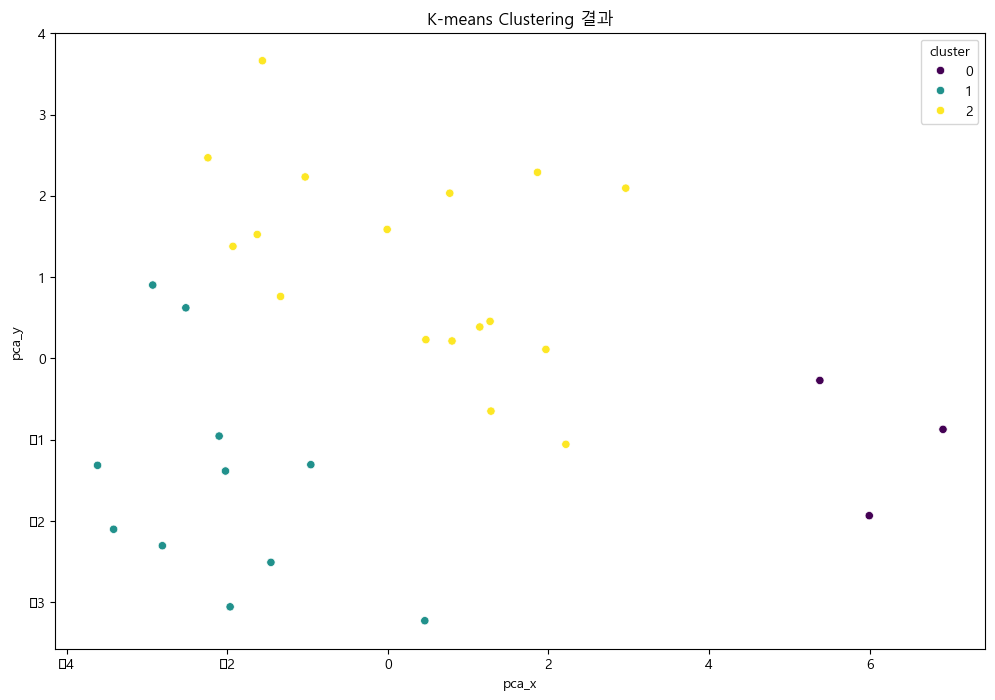

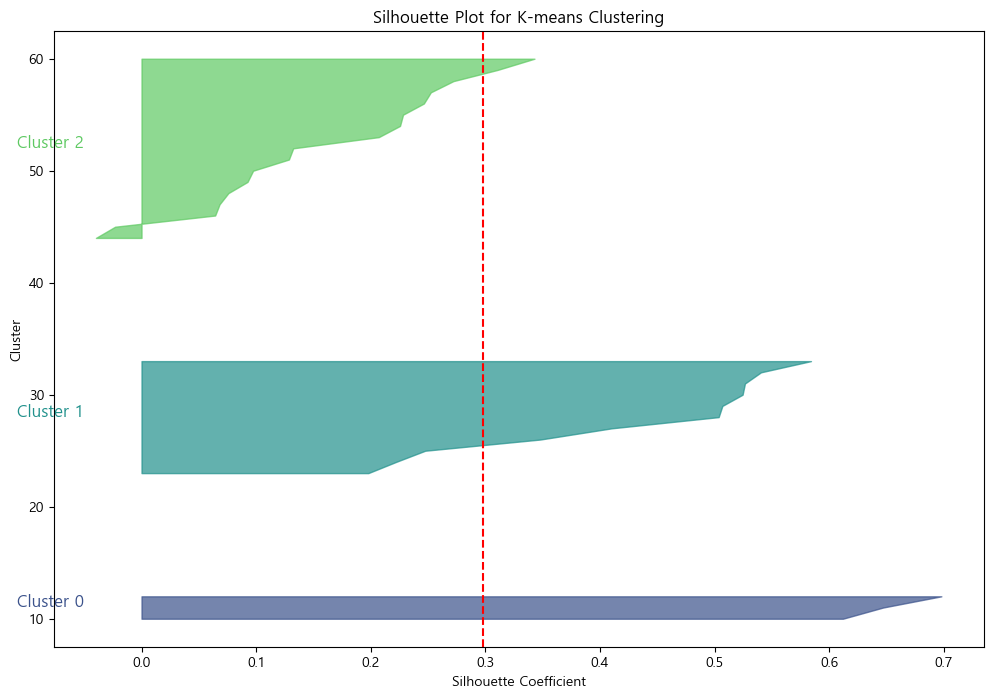

In [288]:
# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(aggregated_data.drop(columns='시군명'))

# 군집 개수 설정
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# 데이터에 군집 결과 추가
aggregated_data['cluster'] = clusters

# 각 군집에 속한 시군명을 집계
cluster_groups = aggregated_data.groupby('cluster')['시군명'].apply(list)

# 군집별로 시군명을 출력
print("각 군집에 속한 시군명:")
for cluster, cities in cluster_groups.items():
    print(f"Cluster {cluster}: {', '.join(cities)}")

# PCA를 통한 시각화
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
aggregated_data['pca_x'] = principal_components[:, 0]
aggregated_data['pca_y'] = principal_components[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=aggregated_data, palette='viridis')
plt.title('K-means Clustering 결과')
plt.show()

# 실루엣 계수 계산
silhouette_vals = silhouette_samples(scaled_features, clusters)

# 군집별 실루엣 계수 플롯
fig, ax = plt.subplots(figsize=(12, 8))
y_lower = 10
for cluster in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    
    size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size
    color = sns.color_palette('viridis', n_colors=n_clusters)[cluster]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {cluster}', va='center', ha='right', color=color, fontsize=12)
    y_lower = y_upper + 10

ax.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for K-means Clustering')
plt.show()

<hr>

In [277]:
# 필요한 열만 선택
columns_to_cluster = [
      '결제건수', '결제금액', '1회평균결제금액', '총인구', '총결제건수(연도별)', '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율', '상점수'
]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data[columns_to_cluster])

# 군집 개수 설정
n_clusters = 4

# K-means 모델 학습
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# 데이터에 군집 결과 추가
merged_data['cluster'] = clusters

# 시군명을 기준으로 군집화 결과 집계
# 시군명을 기준으로 평균 군집 라벨을 계산
city_cluster_avg = merged_data.groupby('시군명')['cluster'].mean().round().astype(int)
city_cluster_avg.name = 'cluster'

# 시군명과 군집 정보를 데이터프레임으로 변환
city_cluster_df = city_cluster_avg.reset_index()

# 군집화 결과 출력
print("시군명과 군집:")
print(city_cluster_df)


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


시군명과 군집:
     시군명  cluster
0    가평군        0
1    고양시        1
2    과천시        0
3    광명시        0
4    광주시        0
5    구리시        0
6    군포시        0
7    김포시        1
8   남양주시        1
9   동두천시        2
10   부천시        2
11   성남시        1
12   수원시        2
13   시흥시        1
14   안산시        1
15   안성시        1
16   안양시        1
17   양주시        2
18   양평군        0
19   여주시        1
20   연천군        1
21   오산시        2
22   용인시        2
23   의왕시        2
24  의정부시        2
25   이천시        0
26   파주시        1
27   평택시        1
28   포천시        2
29   하남시        0
30   화성시        2


c:\Users\kimbomi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


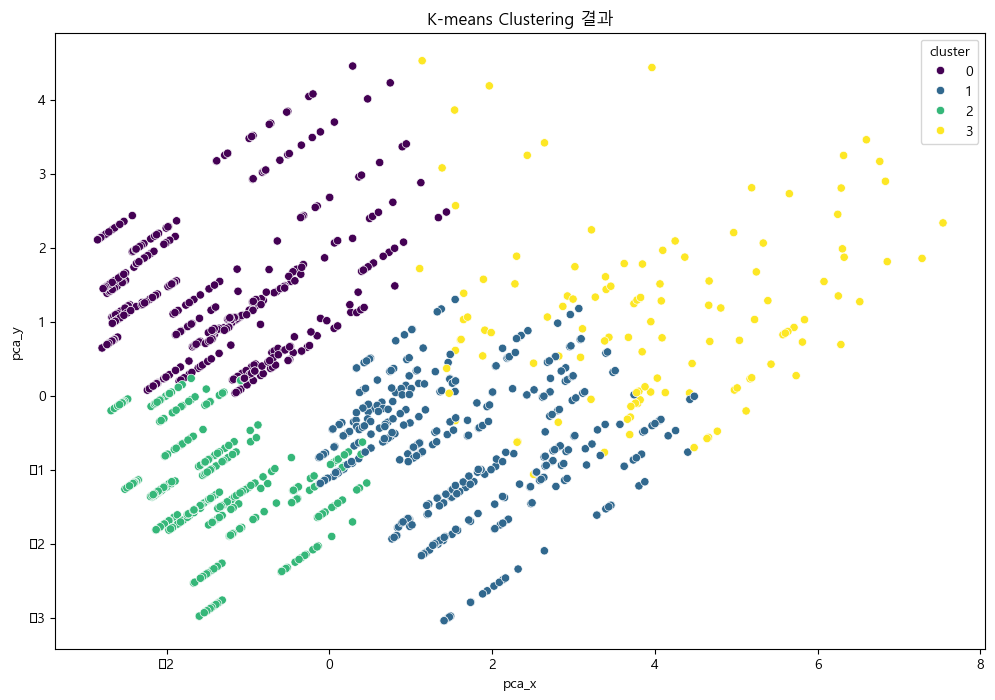

In [278]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
merged_data['pca_x'] = principal_components[:, 0]
merged_data['pca_y'] = principal_components[:, 1]
merged_data.head(3)

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=merged_data, palette='viridis')
plt.title('K-means Clustering 결과')
plt.show()

c:\Users\kimbomi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


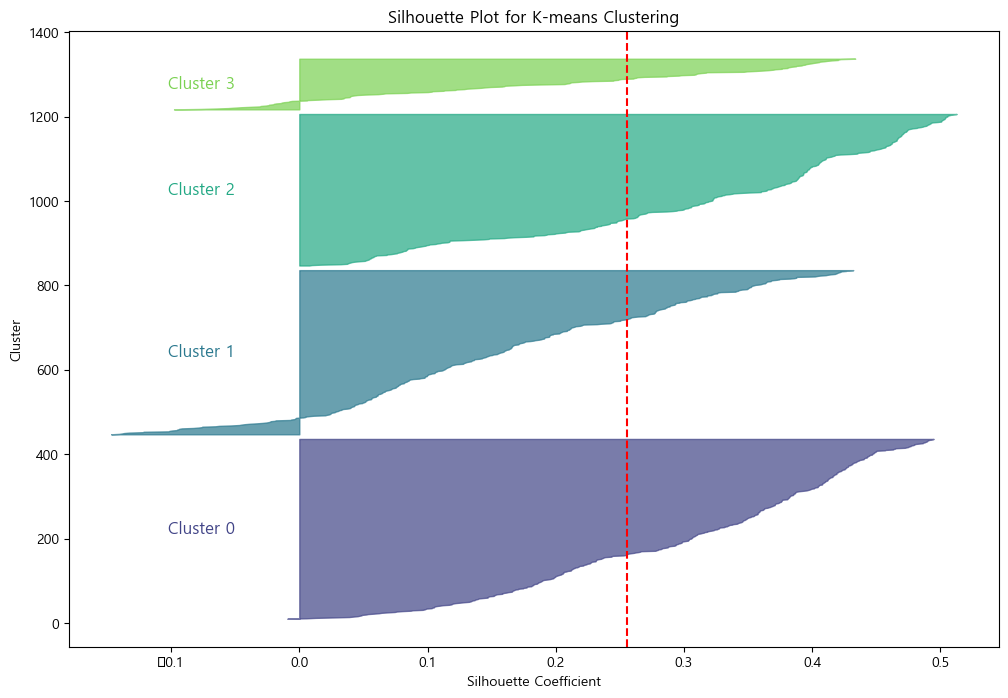

In [279]:
# 실루엣 계수 계산
silhouette_vals = silhouette_samples(scaled_features, clusters)

# 시각화 준비
fig, ax = plt.subplots(figsize=(12, 8))

# 군집별로 실루엣 계수 플롯
y_lower = 10
for cluster in range(n_clusters):
    # 클러스터 데이터 추출
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    
    # 군집별 실루엣 계수 플롯
    size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size
    color = sns.color_palette('viridis', n_colors=n_clusters)[cluster]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {cluster}', va='center', ha='right', color=color, fontsize=12)
    y_lower = y_upper + 10

# 시각화 설정
ax.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for K-means Clustering')
plt.show()

In [280]:
# 각 군집에 속한 시군명을 집계
cluster_groups = merged_data.groupby('cluster')['시군명'].unique()

# 군집별로 시군명을 출력
print("각 군집에 속한 시군명:")
for cluster, cities in cluster_groups.items():
    print(f"Cluster {cluster}: {', '.join(cities)}")

각 군집에 속한 시군명:
Cluster 0: 가평군, 과천시, 광명시, 광주시, 구리시, 군포시, 김포시, 안성시, 양평군, 여주시, 연천군, 오산시, 이천시, 하남시
Cluster 1: 고양시, 김포시, 남양주시, 부천시, 성남시, 수원시, 시흥시, 안산시, 안양시, 용인시, 의정부시, 파주시, 평택시, 화성시
Cluster 2: 김포시, 동두천시, 안성시, 양주시, 여주시, 연천군, 오산시, 의왕시, 의정부시, 파주시, 포천시
Cluster 3: 고양시, 광주시, 김포시, 남양주시, 부천시, 성남시, 수원시, 시흥시, 안산시, 안양시, 용인시, 파주시, 평택시, 하남시, 화성시
